<a href="https://colab.research.google.com/github/samuelhtampubolon/SDPM2025/blob/main/Evaluasi_Model_Regresi_Secara_Komprehensif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#   Memuat Data & Inisialisasi Model ---
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
# Inisialisasi model Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [3]:
#   Cetak Metrik Evaluasi Regresi ---
print("======= Metrik Evaluasi Model Regresi =======")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.4f}")

======= Metrik Evaluasi Model Regresi =======
R-squared (R²): 0.8051
Mean Squared Error (MSE): 0.2554
Mean Absolute Error (MAE): 0.3275


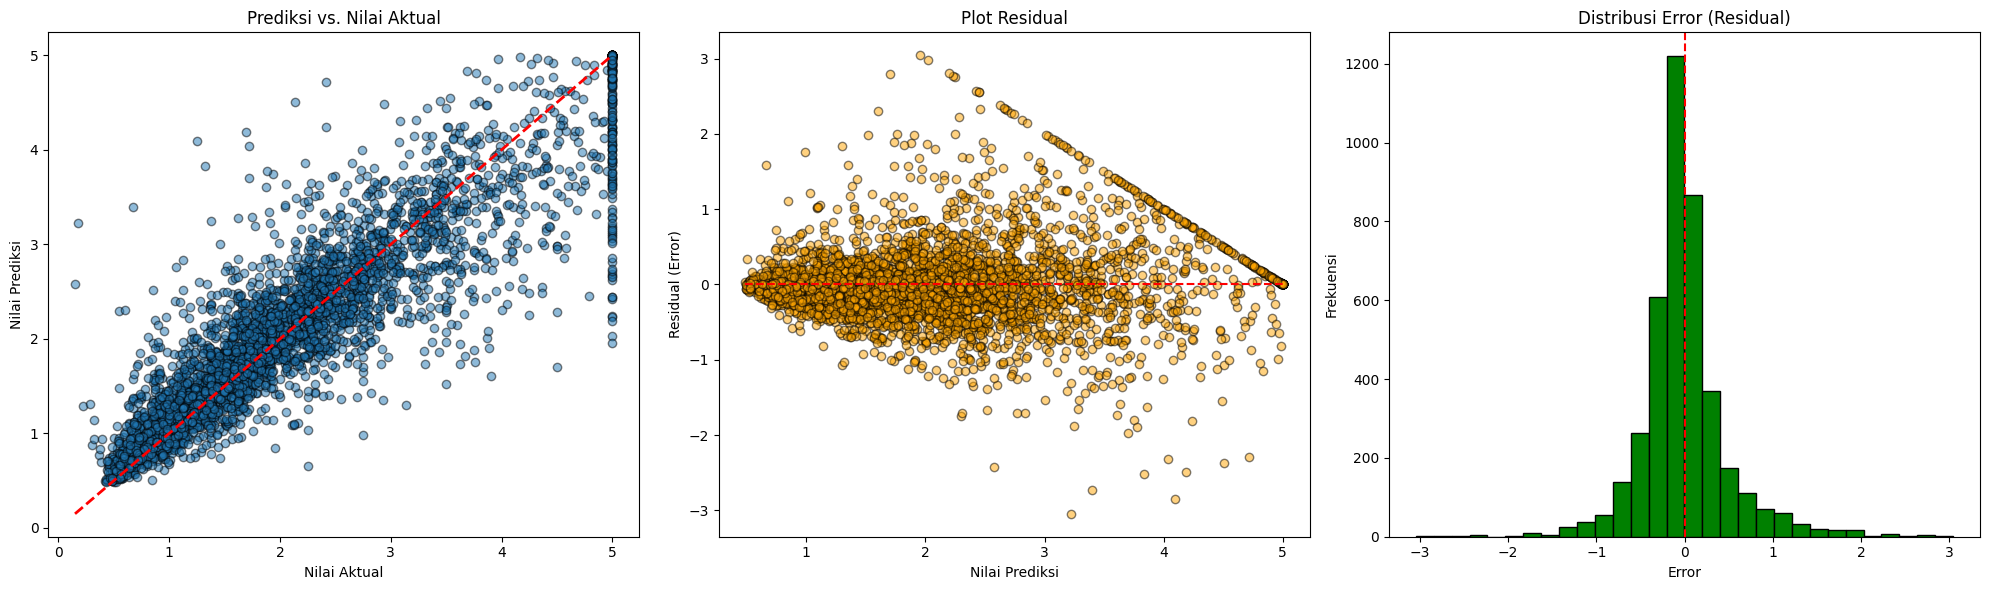

In [4]:
#   Tampilkan 3 Visualisasi Evaluasi ---
plt.figure(figsize=(20, 6))

# Visual 1: Plot Prediksi vs. Aktual
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.5, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title("Prediksi vs. Nilai Aktual")
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")

# Visual 2: Plot Residual (Error)
residuals = y_test - y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_pred, residuals, alpha=0.5, edgecolor='k', color='orange')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--')
plt.title("Plot Residual")
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual (Error)")

# Visual 3: Histogram Distribusi Error
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=30, edgecolor='k', color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title("Distribusi Error (Residual)")
plt.xlabel("Error")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()